In [1]:
import os
from glob import glob
from skimage import data, io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# declare functions

In [2]:
def image_path(person, id_):
    return glob(os.path.join(os.path.abspath('..\\data\\lfw2\\'), person, '*' + id_ + '.jpg'))[0]

In [3]:
'''
Parameters: 
    - img_matrix: (ndarray)
Output:
    - image plot
'''
def plt_img(img_matrix):
    io.imshow(img_matrix)

In [4]:
'''
Parameters: 
- Path: The image should be in the working directory or a full path of image
should be given;
- color: Second argument is a flag which specifies the way image should be read.
    cv2.IMREAD_COLOR : Loads a color image. Any transparency of image
    will be neglected;
    cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode;
    cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel;
Note Instead of these three flags, you can simply pass integers 1, 0 or -1
respectively.
Output:
- img_array: (ndarray)
'''
def open_img(path, color):
    return cv2.imread(path, color)

# example

In [5]:
# Open file
with open('..\\data\\pairsDevTrain.txt') as f:
    lines = [line.rstrip() for line in f]

In [6]:
# example
lines[1].split('\t')

['Aaron_Peirsol', '1', '2']

In [7]:
# image A
image_a = image_path(lines[1].split('\t')[0], lines[1].split('\t')[1])

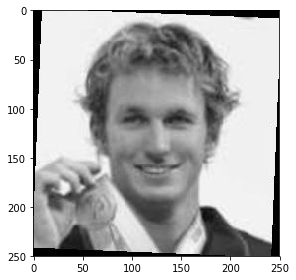

In [8]:
plt_img(open_img(image_a, color=0))

In [9]:
# image B
image_b = image_path(lines[1].split('\t')[0], lines[1].split('\t')[2])

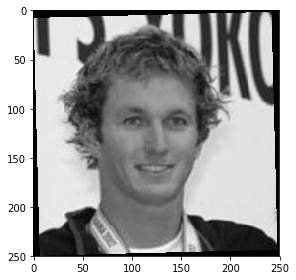

In [10]:
plt_img(open_img(image_b, color=0))